# CZ4042 Tutorial 2 

# Wee JunJie

## Q1(a): Stochastic Gradient Descent Learning

The training data is as follows: 

|  $x=(x_1,x_2,x_3)$  |  $y$  |
|:-------------------:|:-----:|
|  (0.09 -0.44 -0.15) | -2.57 |
|  (0.69 -0.99 -0.76) | -2.97 |
|  (0.34 0.65 -0.73)  |  0.96 |
|  (0.15 0.78 -0.58)  |  1.04 |
| (-0.63 -0.78 -0.56) | -3.21 |
|  (0.96 0.62 -0.66)  |  1.05 |
|  (0.63 -0.45 -0.14) | -2.39 |
|  (0.88 0.64 -0.33)  |  0.66 |

In [105]:
import tensorflow as tf
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

import os
if not os.path.isdir('figures'):
	print('creating the figures folder')
	os.makedirs('figures')

[[ 0.09 -0.44 -0.15]
 [ 0.69 -0.99 -0.76]
 [ 0.34  0.65 -0.73]
 [ 0.15  0.78 -0.58]
 [-0.63 -0.78 -0.56]
 [ 0.96  0.62 -0.66]
 [ 0.63 -0.45 -0.14]
 [ 0.88  0.64 -0.33]]
[-2.57 -2.97  0.96  1.04 -3.21  1.05 -2.39  0.66]
0.01
w: [0.77132064 0.02075195 0.6336482 ], b: 0.0
iter: 1
p: 1
x:[ 0.34  0.65 -0.73], d:0.96
y: -0.18682542443275452
se: 1.3152085542678833
w: [0.77521986 0.02820631 0.6252764 ], b: 0.011468254029750824
iter: 1
p: 2
x:[ 0.63 -0.45 -0.14], d:-2.39
y: 0.3996252417564392
se: 7.782010078430176
w: [0.7576452  0.04075963 0.62918186], b: -0.01642799936234951
iter: 1
p: 3
x:[ 0.88  0.64 -0.33], d:0.66
y: 0.46875590085983276
se: 0.036574315279722214
w: [0.7593281  0.04198359 0.62855077], b: -0.014515558257699013
iter: 1
p: 4
x:[ 0.96  0.62 -0.66], d:1.05
y: 0.3256257176399231
se: 0.5247180461883545
w: [0.76628214 0.04647471 0.6237699 ], b: -0.007271816022694111
iter: 1
p: 5
x:[ 0.09 -0.44 -0.15], d:-2.57
y: -0.052320778369903564
se: 6.338708400726318
w: [0.7640162  0.0575525  0.

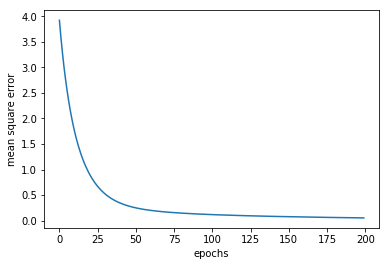

In [4]:
no_iters = 200
lr = 0.01

SEED = 10
np.random.seed(SEED)

# generate training data
X = np.array([[0.09, -0.44, -0.15],
     [0.69, -0.99, -0.76],
     [0.34, 0.65, -0.73],
     [0.15, 0.78, -0.58],
     [-0.63, -0.78, -0.56],
     [0.96, 0.62, -0.66],
     [0.63, -0.45, -0.14],
     [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])

print(X)
print(Y)
print(lr)

# Model parameters
w = tf.Variable(np.random.rand(3), dtype=tf.float32)
b = tf.Variable(0., dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32, [3])
d = tf.placeholder(tf.float32)

y = tf.tensordot(x, w, axes=1) + b
loss = tf.square(d - y) # sum of the squares

# optimizer
grad_w = -(d - y)*x
grad_b = -(d - y)
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)

# initialize variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# print initial weights and biases
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

# training loop begins
err = []
idx = np.arange(len(X))
for i in range(no_iters):
        
  err_ = []
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
  for p in np.arange(len(X)):
    y_, loss_, w_, b_ = sess.run([y, loss, w_new, b_new], {x: X[p], d: Y[p]})

    if i == 0:
      print('iter: {}'.format(i+1))
      print('p: {}'.format(p+1))
      print('x:{}, d:{}'.format(X[p], Y[p]))
      print('y: {}'.format(y_))
      print('se: {}'.format(loss_))
      print('w: {}, b: {}'.format(w_, b_))

    err_.append(loss_)
  err.append(np.mean(err_))
  if i%10 == 0:
          print('iter: %d, mse: %g'%(i, err[i]))

# print final weights and error
w_, b_ = sess.run([w, b])
print('w: %s, b: %s'%(w_, b_))
print('mse: %g'%err[no_iters-1])

# plot learning curve
plt.figure(1)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.savefig('./figures/2.1a_1.png')

# find the predicted values of inputs
pred = []
for p in np.arange(len(X)):
	pred.append(sess.run(y, {x:X[p]}))

print("Predicted values: ",pred)

## Q1(b): Batch Gradient Descent for Linear Neuron

w: [[0.9072852 ]
 [0.46888128]
 [0.831045  ]], b: [0.]
iter: 0, mse: 21.7814
iter: 1
y: [[-0.35792547]
 [-0.64364904]
 [-0.0348788 ]
 [-0.00528041]
 [-1.533784  ]
 [ 0.56035936]
 [ 0.12587723]
 [ 0.78125024]]
loss: 21.78136444091797
w: [[0.8902548 ]
 [0.54560727]
 [0.85211885]], b: [-0.07016338]
iter: 2
y: [[-0.45771256]
 [-0.80383503]
 [-0.06794527]
 [-0.02325687]
 [-1.6554035 ]
 [ 0.5171701 ]
 [ 0.01756305]
 [ 0.7465795 ]]
loss: 19.845748901367188
w: [[0.8755063 ]
 [0.61964685]
 [0.86986953]], b: [-0.13338307]
iter: 10, mse: 9.91319
iter: 20, mse: 5.54901
iter: 30, mse: 3.57388
iter: 40, mse: 2.58701
iter: 50, mse: 2.04597
iter: 60, mse: 1.71647
iter: 70, mse: 1.49343
iter: 80, mse: 1.32826
iter: 90, mse: 1.19752
iter: 100, mse: 1.08927
iter: 110, mse: 0.996924
iter: 120, mse: 0.916534
iter: 130, mse: 0.845549
iter: 140, mse: 0.782195
iter: 150, mse: 0.725174
iter: 160, mse: 0.673504
iter: 170, mse: 0.626418
iter: 180, mse: 0.583309
iter: 190, mse: 0.543687
iter: 200, mse: 0.507153
i

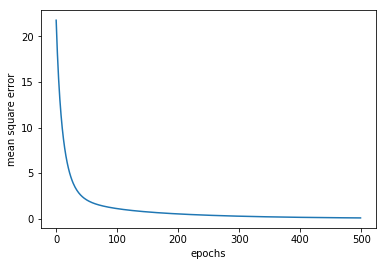

In [5]:
no_iters=500

# generate training data
X = np.array([[0.09, -0.44, -0.15],
     [0.69, -0.99, -0.76],
     [0.34, 0.65, -0.73],
     [0.15, 0.78, -0.58],
     [-0.63, -0.78, -0.56],
     [0.96, 0.62, -0.66],
     [0.63, -0.45, -0.14],
     [0.88, 0.64, -0.33]])
Y = np.array([-2.57, -2.97, 0.96, 1.04, -3.21, 1.05, -2.39, 0.66])
Y = Y.reshape(8,1)

# Model parameters
w = tf.Variable(np.random.rand(3,1), dtype=tf.float32)
b = tf.Variable([0.], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32, [None, 3])
d = tf.placeholder(tf.float32, [None, 1])

y = tf.matmul(x,w) + b
loss = tf.reduce_sum(tf.square(d - y)) # sum of the squares

# optimizer
grad_w = -tf.matmul(tf.transpose(x), d - y)
grad_b = -tf.reduce_sum(d - y)
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)


# training loop
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init) # intialize values

# print initial weights
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

err = []
for i in range(no_iters):
  sess.run([loss, w_new, b_new], {x: X, d: Y})
  err.append(sess.run(loss, {x: X, d: Y}))

  if i%10 == 0:
          print('iter: %d, mse: %g'%(i, err[i]))

  if (i < 2):
  	y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
  	print('iter: {}'.format(i+1))
  	print('y: {}'.format(y_))
  	print('loss: {}'.format(loss_))
  	print('w: {}, b: {}'.format(w_, b_))


# evaluate final weights and training error
y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
print("w: %s b: %s"%(w_, b_))
print("y: %s, mse: %g"%(y_, loss_))


# plot learning curves
plt.figure(1)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.savefig('./figures/Tutorial2_1b.png')


pred = sess.run(y, {x: X})

## Q2

Design a perceptron to approximate the function $y$: $$y=0.5+x_1+3x_2^2$$

for inputs $0\le x_1,x_2\le 1$

The results below show that Stochastic Gradient Descent Learning has better performance than Gradient Descent Learning as the mean squared error is lower. 

### Using Gradient Descent Learning

w: [[0.26268592]
 [0.98096   ]], b: [0.]
iter: 0, mse: 211.652
iter: 1
loss: 211.65188598632812
w: [[-0.22571006]
 [ 0.7912451 ]], b: [-1.3156645]
iter: 2
loss: 348.0140380859375
w: [[0.9657061]
 [2.307933 ]], b: [0.66384745]
iter: 10, mse: 46.1145
iter: 20, mse: 29.2427
iter: 30, mse: 21.0133
iter: 40, mse: 21.1952
iter: 50, mse: 21.4358
iter: 60, mse: 21.1029
iter: 70, mse: 21.0265
iter: 80, mse: 21.078
iter: 90, mse: 21.08
iter: 100, mse: 21.0676
iter: 110, mse: 21.0681
iter: 120, mse: 21.0703
iter: 130, mse: 21.0699
iter: 140, mse: 21.0695
iter: 150, mse: 21.0696
iter: 160, mse: 21.0697
iter: 170, mse: 21.0697
iter: 180, mse: 21.0697
iter: 190, mse: 21.0697
w: [[1.5217261]
 [4.08261  ]] b: [-2.3759856] mse: 23.8553


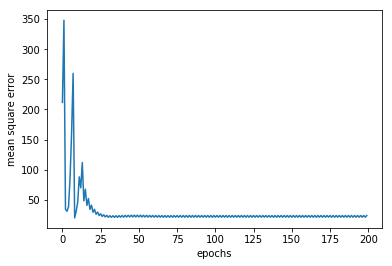

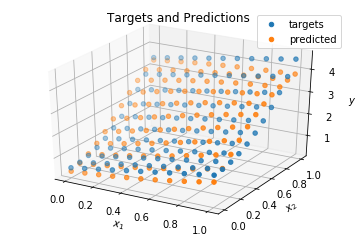

In [43]:
no_iters=200

# generate training data
X = np.zeros((121,2))
Y = np.zeros((121,1))

n = 0
for i in np.arange(0,1.01,0.1):
    for j in np.arange(0,1.01,0.1):
        X[n]=[i,j]
        Y[n,0]=0.5+i+3*j*j
        n+=1

# Model parameters
w = tf.Variable(np.random.rand(2,1), dtype=tf.float32)
b = tf.Variable([0.], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32, [None, 2])
d = tf.placeholder(tf.float32, [None, 1])

u = tf.matmul(x,w) + b
y = 4*tf.sigmoid(u)
loss = tf.reduce_sum(tf.square(d - y)) # sum of the squares

# optimizer
grad_w, grad_b = tf.gradients(loss, [w, b])
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)


# training loop
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init) # intialize values

# print initial weights
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

err = []
for i in range(no_iters):
  sess.run([loss, w_new, b_new], {x: X, d: Y})
  err.append(sess.run(loss, {x: X, d: Y}))

  if i%10 == 0:
          print('iter: %d, mse: %g'%(i, err[i]))

  if (i < 2):
  	y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
  	print('iter: {}'.format(i+1))
  	#print('y: {}'.format(y_))
  	print('loss: {}'.format(loss_))
  	print('w: {}, b: {}'.format(w_, b_))


# evaluate final weights and training error
y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
print("w: %s b: %s mse: %g"%(w_, b_,loss_))
#print("y: %s, mse: %g"%(y_, loss_))


# plot learning curves
plt.figure(1)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.savefig('./figures/Tutorial2_2a.png')


pred = sess.run(y, {x: X})

fig = plt.figure(2)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y, 'ro', label='targets')
ax.scatter(X[:,0], X[:,1], pred, 'b^', label='predicted')
X1 = np.arange(0, 1, 0.1)
X2 = np.arange(0, 1, 0.1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.title('Targets and Predictions')
plt.legend()
plt.savefig('./figures/Tutorial2_2a(2).png')

plt.show()

### Using Stochastic Gradient Descent Learning

w: [0.41569117 0.5173138 ], b: [0.]
iter: 0, mse: 0.729198
iter: 10, mse: 0.134406
iter: 20, mse: 0.0930413
iter: 30, mse: 0.0850443
iter: 40, mse: 0.0824279
iter: 50, mse: 0.0825069
iter: 60, mse: 0.081993
iter: 70, mse: 0.0823093
iter: 80, mse: 0.0820766
iter: 90, mse: 0.0821284
iter: 100, mse: 0.0823177
iter: 110, mse: 0.0821522
iter: 120, mse: 0.0822671
iter: 130, mse: 0.082317
iter: 140, mse: 0.0823205
iter: 150, mse: 0.0821185
iter: 160, mse: 0.0817314
iter: 170, mse: 0.0822509
iter: 180, mse: 0.0823917
iter: 190, mse: 0.082351
w: [1.2332493 3.5176575], b: [-2.398533]
mse: 0.0820044


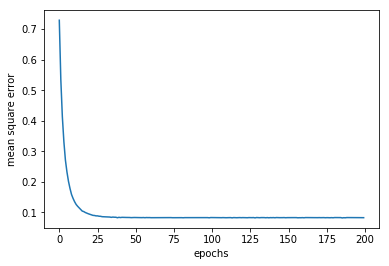

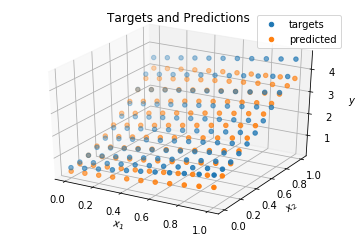

In [46]:
no_iters = 200
lr = 0.01

# generate training data
X = np.zeros((121,2))
Y = np.zeros(121)

n = 0
for i in np.arange(0,1.01,0.1):
    for j in np.arange(0,1.01,0.1):
        X[n]=[i,j]
        Y[n]=0.5+i+3*j*j
        n+=1

# Model parameters
w = tf.Variable(np.random.rand(2), dtype=tf.float32)
b = tf.Variable([0.], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32, [2])
d = tf.placeholder(tf.float32)

u = tf.tensordot(x, w, axes=1) + b
y = 4*tf.sigmoid(u)
loss = tf.square(d - y) # sum of the squares

# optimizer
grad_w, grad_b = tf.gradients(loss, [w, b])
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)

# initialize variables
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# print initial weights and biases
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

# training loop begins
err = []
idx = np.arange(len(X))
for i in range(no_iters):
        
  err_ = []
  np.random.shuffle(idx)
  X, Y = X[idx], Y[idx]
  for p in np.arange(len(X)):
    y_, loss_, w_, b_ = sess.run([y, loss, w_new, b_new], {x: X[p], d: Y[p]})

    err_.append(loss_)
  err.append(np.mean(err_))
  if i%10 == 0:
          print('iter: %d, mse: %g'%(i, err[i]))

# print final weights and error
w_, b_ = sess.run([w, b])
print('w: %s, b: %s'%(w_, b_))
print('mse: %g'%err[no_iters-1])

# plot learning curve
plt.figure(1)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.savefig('./figures/Tutorial2_2b.png')

# find the predicted values of inputs
pred = []
for p in np.arange(len(X)):
	pred.append(sess.run(y, {x:X[p]}))

fig = plt.figure(3)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y, 'ro', label='targets')
ax.scatter(X[:,0], X[:,1], pred, 'b^', label='predicted')
X1 = np.arange(0, 1, 0.1)
X2 = np.arange(0, 1, 0.1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.title('Targets and Predictions')
plt.legend()
plt.savefig('./figures/Tutorial2_2b(2).png')

plt.show()

## Q3 

Train a linear neuron to learn the following function $\phi$ 

$$\phi(x,y)=1.5+ 3.3x-2.5y+0.2xy$$

for $0\le x,y,\le 1$

(a) Sample 25 data points randomly from the input space for training

In [163]:
X = np.random.rand(25, 3)
Y = np.random.rand(25,1)

i=0
for i in np.arange(25):
    X[i,2]=X[i,0]*X[i,1]
    Y[i]=1.5+3.3*X[i,0]-2.5*X[i,1]+0.2*X[i,0]*X[i,1]

print(X)
print(Y)

[[0.40175072 0.84376239 0.33898214]
 [0.41780567 0.57210442 0.23902847]
 [0.56984315 0.52162479 0.29724431]
 [0.50960166 0.99317255 0.50612238]
 [0.15692652 0.22506425 0.03531855]
 [0.3270567  0.57936758 0.18948605]
 [0.91343002 0.02465707 0.02252251]
 [0.74247398 0.40334826 0.29947559]
 [0.71500957 0.72514366 0.51848466]
 [0.61970023 0.86234961 0.53439825]
 [0.14441802 0.67382538 0.09731253]
 [0.46328553 0.2143468  0.09930377]
 [0.77181768 0.64079705 0.49457849]
 [0.34004699 0.75147794 0.25553781]
 [0.56642495 0.68333645 0.38705881]
 [0.77642522 0.71078882 0.55187436]
 [0.58797361 0.60308211 0.35459637]
 [0.74418586 0.84420095 0.62824241]
 [0.66361223 0.77466202 0.5140752 ]
 [0.55336055 0.33381007 0.18471733]
 [0.66354977 0.34533071 0.22914411]
 [0.57304042 0.02952599 0.01691959]
 [0.57528928 0.87854949 0.5054201 ]
 [0.02319776 0.62550385 0.01451029]
 [0.10673762 0.10756572 0.01148131]]
[[0.78416782]
 [1.49630336]
 [2.13586929]
 [0.79997859]
 [1.46226058]
 [1.16876537]
 [4.45718088]
 

(b) Use a gradient descent algorithm to train a linear neuron

w: [[0.1664406]
 [0.2516514]
 [0.1995863]], b: [0.]
iter: 0, mse: 1.87121
iter: 1
y: [[1.0225375 ]
 [0.88291883]
 [0.9413643 ]
 [1.1813442 ]
 [0.56637895]
 [0.83377343]
 [0.7860645 ]
 [0.9622221 ]
 [1.1550004 ]
 [1.1793213 ]
 [0.77112955]
 [0.70650434]
 [1.1349921 ]
 [0.93252075]
 [1.0362746 ]
 [1.1842033 ]
 [1.0009894 ]
 [1.2511901 ]
 [1.1537257 ]
 [0.820266  ]
 [0.88376826]
 [0.64745516]
 [1.1591974 ]
 [0.67570937]
 [0.48861158]]
loss: 1.8712085485458374
w: [[0.4082457 ]
 [0.42529047]
 [0.30653533]], b: [0.39577028]
iter: 2
y: [[1.4026489 ]
 [1.2387099 ]
 [1.3198043 ]
 [1.5989618 ]
 [0.84360325]
 [1.1734395 ]
 [1.1633315 ]
 [1.3580879 ]
 [1.5839077 ]
 [1.6051873 ]
 [1.085016  ]
 [1.0335681 ]
 [1.564718  ]
 [1.2913107 ]
 [1.431804  ]
 [1.6232758 ]
 [1.3917598 ]
 [1.6999575 ]
 [1.5783601 ]
 [1.1752578 ]
 [1.2590688 ]
 [0.9723961 ]
 [1.5779033 ]
 [0.9625938 ]
 [0.74758816]]
loss: 1.313962459564209
w: [[0.562186  ]
 [0.50368077]
 [0.36152703]], b: [0.6292522]
iter: 10, mse: 0.790849
iter

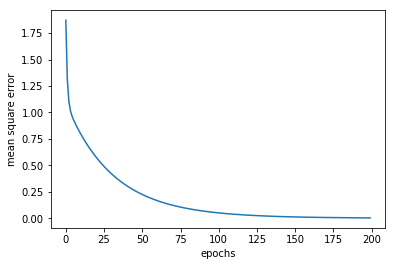

In [164]:
no_iters=200
lr=0.01

# Model parameters
w = tf.Variable(np.random.rand(3,1), dtype=tf.float32)
b = tf.Variable([0.], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32, [None, 3])
d = tf.placeholder(tf.float32, [None, 1])

y = tf.matmul(x,w) + b
loss = tf.reduce_mean(tf.square(d - y)) # sum of the squares

# optimizer
grad_w = -tf.matmul(tf.transpose(x), d - y)
grad_b = -tf.reduce_sum(d - y)
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)


# training loop
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init) # intialize values

# print initial weights
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

err = []
for i in range(no_iters):
  sess.run([loss, w_new, b_new], {x: X, d: Y})
  err.append(sess.run(loss, {x: X, d: Y}))

  if i%10 == 0:
          print('iter: %d, mse: %g'%(i, err[i]))

  if (i < 2):
  	y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
  	print('iter: {}'.format(i+1))
  	print('y: {}'.format(y_))
  	print('loss: {}'.format(loss_))
  	print('w: {}, b: {}'.format(w_, b_))


# evaluate final weights and training error
y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
print("w: %s b: %s"%(w_, b_))
print("y: %s, mse: %g"%(y_, loss_))

w__ = w_

# plot learning curves
plt.figure(1)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.savefig('./figures/Tutorial2_3b.png')


pred = sess.run(y, {x: X})

(c) Compute the training error and plot the function approximated by the linear neuron

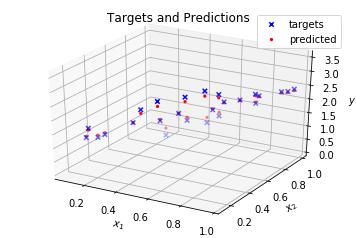

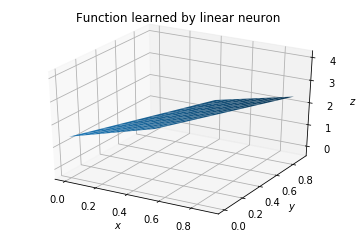

In [109]:
fig = plt.figure(2)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], y_[:,0], color='red', marker='.', label='predicted')
X1 = np.arange(0, 1, 0.1)
X2 = np.arange(0, 1, 0.1)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.title('Targets and Predictions')
plt.legend()
plt.savefig('./figures/Tutorial2_3b(2).png')

plt.show()

fig = plt.figure(3)
ax = fig.gca(projection = '3d')
X1 = np.arange(0, 1, 0.1)
X2 = np.arange(0, 1, 0.1)
X1,X2 = np.meshgrid(X1,X2)
Z = b_ + w_[0]*X1+w_[1]*X2+w_[2]*X1*X2
regression_plane = ax.plot_surface(X1, X2, Z)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.yaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.set_title('Function learned by linear neuron')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.savefig('./figures/Tutorial2_3b(3).png')

plt.show()

(d) Repeat (b) and (c) for a perceptron and compare the results with those of the linear neuron 

w: [[0.7739459 ]
 [0.68682396]], b: [0.]
iter: 0, mse: 2.89874
iter: 10, mse: 1.11419
iter: 20, mse: 0.656893
iter: 30, mse: 0.409121
iter: 40, mse: 0.267395
iter: 50, mse: 0.182086
iter: 60, mse: 0.128498
iter: 70, mse: 0.0936527
iter: 80, mse: 0.0703564
iter: 90, mse: 0.0544262
iter: 100, mse: 0.0433312
iter: 110, mse: 0.0354862
iter: 120, mse: 0.0298695
iter: 130, mse: 0.0258057
iter: 140, mse: 0.0228397
iter: 150, mse: 0.0206588
iter: 160, mse: 0.019045
iter: 170, mse: 0.0178444
iter: 180, mse: 0.0169472
iter: 190, mse: 0.0162739
iter: 200, mse: 0.015767
iter: 210, mse: 0.0153843
iter: 220, mse: 0.0150945
iter: 230, mse: 0.0148747
iter: 240, mse: 0.0147075
iter: 250, mse: 0.0145803
iter: 260, mse: 0.0144832
iter: 270, mse: 0.0144091
iter: 280, mse: 0.0143525
iter: 290, mse: 0.0143091
iter: 300, mse: 0.0142759
iter: 310, mse: 0.0142505
iter: 320, mse: 0.0142309
iter: 330, mse: 0.0142159
iter: 340, mse: 0.0142044
iter: 350, mse: 0.0141956
iter: 360, mse: 0.0141888
iter: 370, mse: 0.0

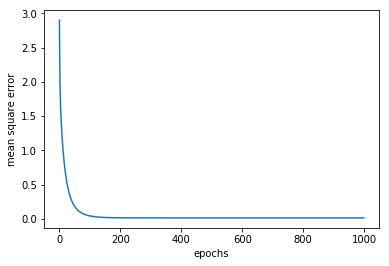

In [150]:
X = np.random.rand(25, 2)
Y = np.random.rand(25,1)

i=0
for i in np.arange(25):
    Y[i]=1.5+3.3*X[i,0]-2.5*X[i,1]+0.2*X[i,0]*X[i,1]

no_iters=1000
lr=0.05

# Model parameters
w = tf.Variable(np.random.rand(2,1), dtype=tf.float32)
b = tf.Variable([0.], dtype=tf.float32)

# Model input and output
x = tf.placeholder(tf.float32, [None, 2])
d = tf.placeholder(tf.float32, [None, 1])

u = tf.matmul(x,w) + b
y = 6*tf.sigmoid(u)-1
loss = tf.reduce_mean(tf.square(d - y)) # sum of the squares

# optimizer
grad_w, grad_b = tf.gradients(loss, [w, b])
w_new = w.assign(w - lr*grad_w)
b_new = b.assign(b - lr*grad_b)


# training loop
init = tf.global_variables_initializer()
sess = tf.Session()

sess.run(init) # intialize values

# print initial weights
w_, b_ = sess.run([w, b])
print('w: {}, b: {}'.format(w_, b_))

err = []
for i in range(no_iters):
  sess.run([loss, w_new, b_new], {x: X, d: Y})
  err.append(sess.run(loss, {x: X, d: Y}))

  if i%10 == 0:
          print('iter: %d, mse: %g'%(i, err[i]))

# evaluate final weights and training error
y_, loss_, w_, b_ = sess.run([y, loss, w, b], {x: X, d: Y})
print("w: %s b: %s"%(w_, b_))
print("y: %s, mse: %g"%(y_, loss_))


# plot learning curves
plt.figure(1)
plt.plot(range(no_iters), err)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.savefig('./figures/Tutorial2_3b.png')


pred = sess.run(y, {x: X})

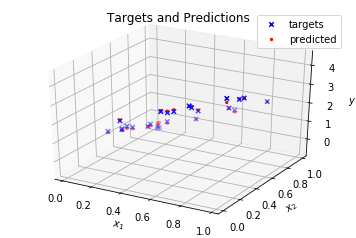

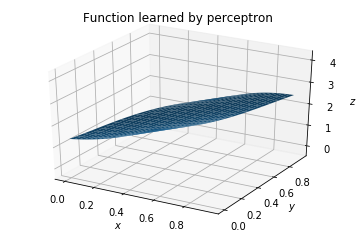

In [161]:
fig = plt.figure(2)
ax = fig.gca(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], y_[:,0], color='red', marker='.', label='predicted')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.title('Targets and Predictions')
plt.legend()
plt.savefig('./figures/Tutorial2_3b(4).png')

plt.show()

fig = plt.figure(3)
ax = fig.gca(projection = '3d')
X1 = np.arange(0, 1, 0.05)
X2 = np.arange(0, 1, 0.05)
X1,X2 = np.meshgrid(X1,X2)
Z = b_ + w_[0]*X1+w_[1]*X2
Z = 6/(1+np.exp(-Z))-1.0
regression_plane = ax.plot_surface(X1, X2, Z)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.yaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.set_title('Function learned by perceptron')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.savefig('./figures/Tutorial2_3b(3).png')

plt.show()